<span style='color:#c7d5e0'>
<h1>Steam Games Library Analysis</h1>
</span>

Data from [Kaggle](https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam)

[Github](https://github.com/dmm4613/steam-games-eda)

<span style='color:#66c0f4'>
<h2> Outline </h2>
<h3> Descriptive Analysis Questions </h3>
<ol>
<li> What operating system has the most playable games? </li>
<li> What is the average price for games on steam? </li>
<li> Which games have been played/reviewed the most? </li>
<li> What games were released in 2020? </li>
<li> How have games in 2020 been rated/received? </li>
</ol>
<h3> Inferential Analysis </h3>
<h3> Recommendations </h3>
</span>

____

<span style='color:#c7d5e0'>
<h2> Descriptive Analysis </h2>
</span>

<span style='color:#c7d5e0'>
<h3> Data intake and cleaning </h3>
</span>

In [5]:
import pandas as pd
import numpy as nd
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
df = pd.read_csv('data/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [4]:
df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


<span style='color:#c7d5e0'>
<h3> What operating system has the most playable games? </h3>

In [7]:
df_os = df[['win', 'mac', 'linux']]
df_os

,win,mac,linux
0,True,False,False
1,True,False,False
2,True,True,True
3,True,False,False
4,True,True,False
...,...,...,...
50867,True,False,False
50868,True,False,False
50869,True,False,False
50870,True,False,False


In [18]:
custom_palette = ['#66c0f4', '#1b2838', '#2a475e', '#c7d5e0']

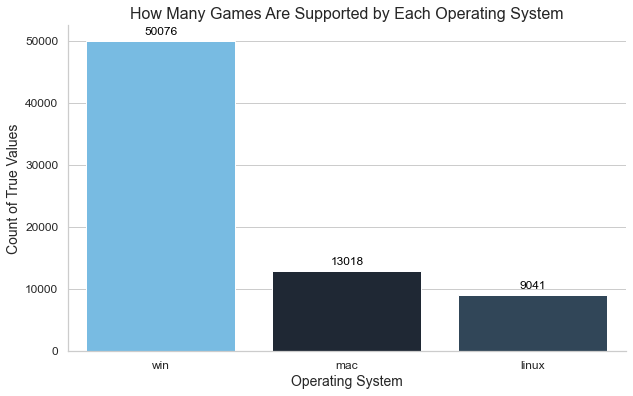

In [24]:
# Transform dataframe to long format
df_long = df_os.melt(var_name='os', value_name='count')

# Filter to include only True values
df_true = df_long[df_long['count'] == True]


sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

g = sns.countplot(data=df_true, x='os', palette=custom_palette)

g.set_xlabel("Operating System", fontsize=14)
g.set_ylabel("Count of True Values", fontsize=14)
g.set_title("How Many Games Are Supported by Each Operating System", fontsize=16)

g.tick_params(axis='x', labelsize=12)
g.tick_params(axis='y', labelsize=12)

# Annotate each bar with the value count
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points',
                fontsize=12, color='black')

sns.despine()

plt.show()

<span style='color:#c7d5e0'>
<p> There's a pretty distinct difference in the amount of games supported by each operating system. Windows OS is the clear standout </p>

<span style='color:#c7d5e0'>
<h3> What is the average price for games on steam? </h3>

In [25]:
df_prices = df[['price_final', 'price_original']]
df_prices

,price_final,price_original
0,9.99,9.99
1,2.99,2.99
2,14.99,14.99
3,14.99,14.99
4,11.99,11.99
...,...,...
50867,22.00,0.00
50868,40.00,0.00
50869,30.00,0.00
50870,17.00,0.00


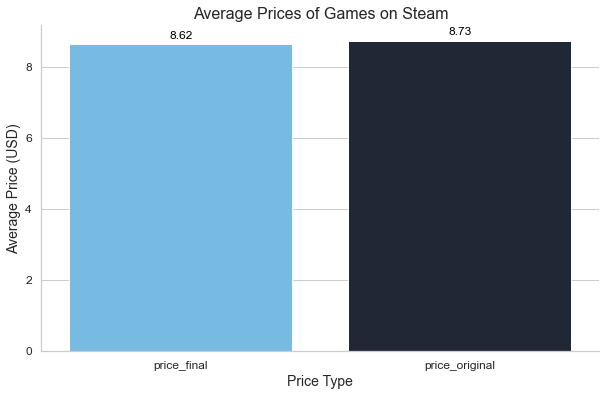

In [26]:
# Calculate average prices
avg_prices = df_prices.mean().reset_index()
avg_prices.columns = ['price_type', 'average_price']

# Set the seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=avg_prices, x='price_type', y='average_price', palette=custom_palette)

# Add labels and title
ax.set_xlabel("Price Type", fontsize=14)
ax.set_ylabel("Average Price (USD)", fontsize=14)
ax.set_title("Average Prices of Games on Steam", fontsize=16)

# Customize the tick parameters
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Annotate each bar with the average price
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points',
                fontsize=12, color='black')

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

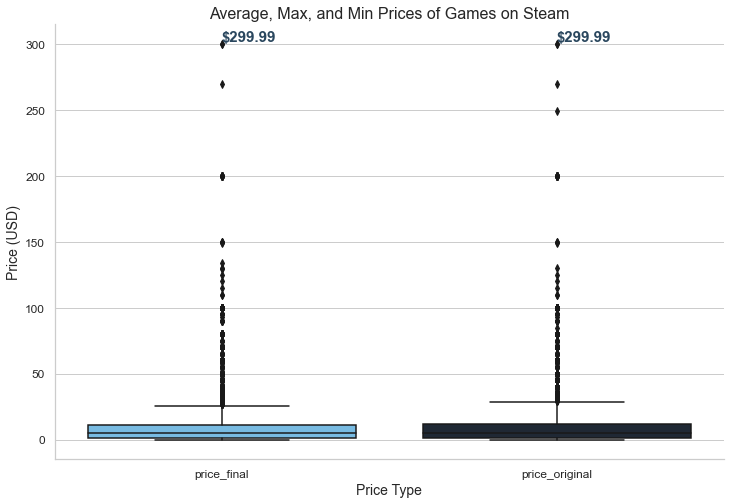

In [37]:

# Transform the DataFrame to long format
df_long = df_prices.melt(var_name='price_type', value_name='price')

# Set the seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df_long, x='price_type', y='price', palette=custom_palette)

# Add labels and title
ax.set_xlabel("Price Type", fontsize=14)
ax.set_ylabel("Price (USD)", fontsize=14)
ax.set_title("Average, Max, and Min Prices of Games on Steam", fontsize=16)

# Customize the tick parameters
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Annotate the highest value
max_prices = df_long.groupby('price_type')['price'].max().reset_index()

for i, row in max_prices.iterrows():
    ax.text(i, row['price'], f'${row["price"]:.2f}', 
            ha='left', va='bottom', fontsize=15, color='#2a475e', weight='bold')

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

<span style='color:#c7d5e0'>
<p> It's pretty crazy how the average price for both original and sale price sits at ~$8.60 - $8.70, whereas there are some insane outliers. A $299.99 game? Let's just pull up what game that is.</p>

In [46]:
filtered_df = df[df['price_final'] == 299.99]

titles = filtered_df['title'].unique()
print(titles[0])

Clickteam Fusion 2.5 Developer Upgrade


<img src='images/click-fusion.png'>

<span style='color:#c7d5e0'>
<p> Clickteam Fusion 2.5 Developer Upgrade. And this is the DLC</p>